<a href="https://colab.research.google.com/github/statisthong/Student-Performance/blob/main/Student%20Performance%20Analysis%20and%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![1](https://user-images.githubusercontent.com/32555702/37250704-5daa4baa-24b7-11e8-9f34-6b0450e839f5.JPG)

# Student Performance Analysis
This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por). 

I have classified these students into three categories, "good", "fair", and "poor", according to their final exam performance. Then I analyzed a few features that have significant influence on students' final performance, including Romantic Status, Alcohol Consumption, Parents Education Level, Frequency Of Going Out, Desire Of Higher Education and Living Area. Finally, leveraging avaiable features, I have created various machine learning models to predict students' final performance classification and have compared models performance based on one-out sample accuracy score.

Dataset available at: http://archive.ics.uci.edu/ml/datasets/Student+Performance#

![kids](https://user-images.githubusercontent.com/32555702/37250835-ffa33bcc-24b9-11e8-8b0f-f5275640cd27.png)



________________________________________________________________________________________________________________________________

#### Table of Content
1. Import Packages
2. Load Dataset
3. Data Preparation
4. EDA
     - 4.1 Final Grade Distribution
     - 4.2 Correlation Heatmap
     - 4.3 Romantic Status
     - 4.4 Alcohol Consumption
     - 4.5 Parents Education Level
     - 4.6 Frequency Of Going Out
     - 4.7 Desire Of Higher Education
     - 4.8 Urban Vs. Rural Students
5. Classification
     - 5.1 Prepare Dataset For Modelling
     - 5.2 Decision Tree Classifier
     - 5.3 Random Forest Classifier
     - 5.4 Support Vector Classifier
     - 5.5 Logistic Regression Classifier
     - 5.6 Ada Boost Classifier
     - 5.7 Sochastic Gradient Descent Classifier
     - 5.8 Model Selection
6. Summary

## 1. Import Packages

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import statsmodels.api as sm

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2. Load Dataset

In [8]:
# load datasets for two subjects, Math and Portuguese
mat = pd.read_csv("/content/drive/MyDrive/data/Student/student-mat.csv", sep=';')
por = pd.read_csv("/content/drive/MyDrive/data/Student/student-por.csv", sep=';')

## 3. Data Preparation

In [9]:
# merge datasets
df = pd.concat([mat,por])

In [10]:
# rename column labels
df.columns = ['school','sex','age','address','family_size','parents_status','mother_education','father_education',
           'mother_job','father_job','reason','guardian','commute_time','study_time','failures','school_support',
          'family_support','paid_classes','activities','nursery','desire_higher_edu','internet','romantic','family_quality',
          'free_time','go_out','weekday_alcohol_usage','weekend_alcohol_usage','health','absences','period1_score','period2_score','final_score']

In [11]:
# convert final_score to categorical variable # Good:15~20 Fair:10~14 Poor:0~9
df['final_grade'] = 'na'
df.loc[(df.final_score >= 15) & (df.final_score <= 20), 'final_grade'] = 'good' 
df.loc[(df.final_score >= 10) & (df.final_score <= 14), 'final_grade'] = 'fair' 
df.loc[(df.final_score >= 0) & (df.final_score <= 9), 'final_grade'] = 'poor' 
df.head(5)

,school,sex,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,...,free_time,go_out,weekday_alcohol_usage,weekend_alcohol_usage,health,absences,period1_score,period2_score,final_score,final_grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,poor
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,poor
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,fair
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,good
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,fair


  # Let's have a look at the variables!

In [20]:
# look for missing values
df.isnull().any()

school                   False
sex                      False
age                      False
address                  False
family_size              False
parents_status           False
mother_education         False
father_education         False
mother_job               False
father_job               False
reason                   False
guardian                 False
commute_time             False
study_time               False
failures                 False
school_support           False
family_support           False
paid_classes             False
activities               False
nursery                  False
desire_higher_edu        False
internet                 False
romantic                 False
family_quality           False
free_time                False
go_out                   False
weekday_alcohol_usage    False
weekend_alcohol_usage    False
health                   False
absences                 False
period1_score            False
period2_score            False
final_sc

# *Yay! There is no missing values!*

# 4. EDA

### 4.1 Final Grade Distribution

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number of Student')

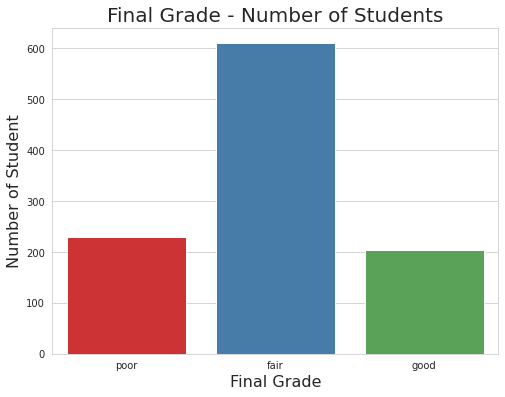

In [13]:
# Final Grade Countplot
plt.figure(figsize=(8,6))
sns.countplot(df.final_grade, order=["poor","fair","good"], palette='Set1')
plt.title('Final Grade - Number of Students',fontsize=20)
plt.xlabel('Final Grade', fontsize=16)
plt.ylabel('Number of Student', fontsize=16)

###        

-------------------------------------------------------------------------------------------------------------------------------

![4](https://user-images.githubusercontent.com/32555702/37250708-5e36dad4-24b7-11e8-84e8-304897e5c412.png)
![3](https://user-images.githubusercontent.com/32555702/37250706-5dde1f2a-24b7-11e8-8f3a-67a81c22f247.JPG)





________________________________________________________________________________________________________________________________


### 4.2 Correlation Heatmap

Text(0.5, 1.0, 'Correlation Heatmap')

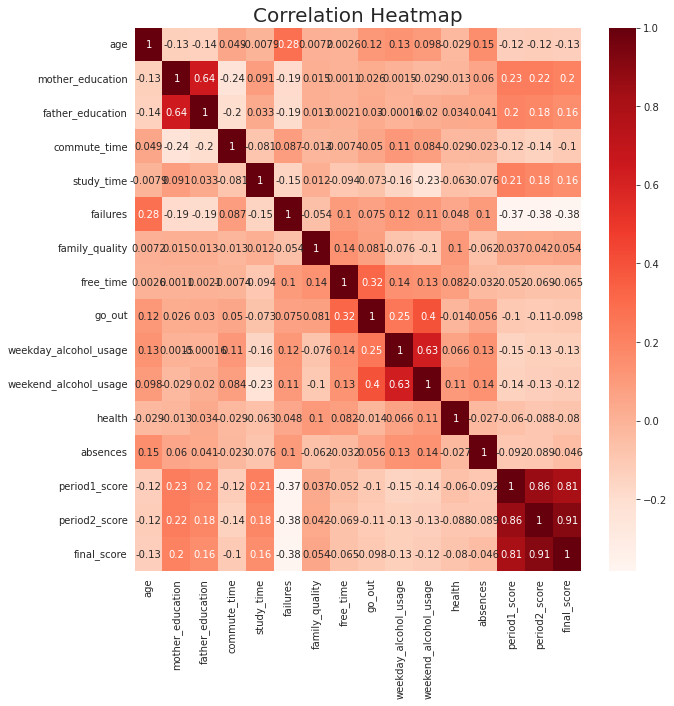

In [21]:
# see correlation between variables through a correlation heatmap
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap="Reds")
plt.title('Correlation Heatmap', fontsize=20)

![5](https://user-images.githubusercontent.com/32555702/37250709-5e535efc-24b7-11e8-97f6-48d2c084c42e.JPG)

### 4.3 Final Grade By Romantic Status
see how students in a romantic relationship vs. those not in a relationship perform 

In [15]:
# romantic status
perc = (lambda col: col/col.sum())
index = ['poor','fair','good']
romance_tab1 = pd.crosstab(index=df.final_grade, columns=df.romantic)
romance_tab = np.log(romance_tab1)
romance_perc = romance_tab.apply(perc).reindex(index)

<Figure size 432x288 with 0 Axes>

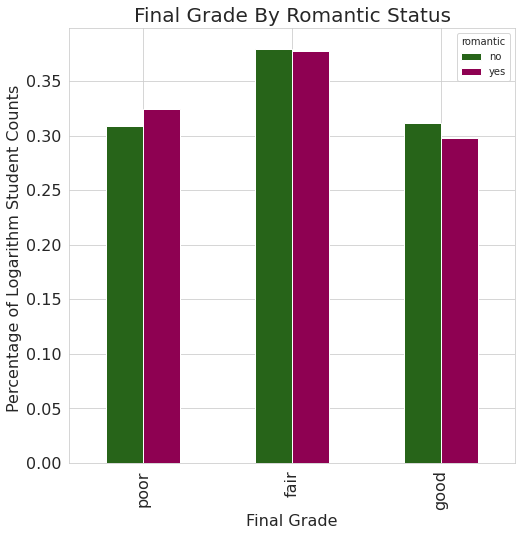

In [16]:
plt.figure()
romance_perc.plot.bar(colormap="PiYG_r", fontsize=16, figsize=(8,8))
plt.title('Final Grade By Romantic Status', fontsize=20)
plt.ylabel('Percentage of Logarithm Student Counts ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

# Hyphothesis Testing confirmed, romantic status has a significant correlation with final grade.

In [17]:
# chi-square test result -- significant!
import statsmodels.api as sm
romance_table = sm.stats.Table(romance_tab1)
romance_rslt = romance_table.test_nominal_association()
romance_rslt.pvalue

0.038810128743959726

![6](https://user-images.githubusercontent.com/32555702/37250710-5f1cc6b6-24b7-11e8-9d25-66cfde267d22.JPG)

### 4.4 Final Grade By Alcohol Consumption
See how alcohol consumption influences students' final grade

![7](https://user-images.githubusercontent.com/32555702/37250711-5f632e80-24b7-11e8-886a-baf51f41fa45.JPG)

![8.JPG](attachment:8.JPG)

In [18]:
# weekend alcohol consumption
alc_tab1 = pd.crosstab(index=df.final_grade, columns=df.weekend_alcohol_usage)
alc_tab = np.log(alc_tab1)
alc_perc = alc_tab.apply(perc).reindex(index)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


ValueError: ignored

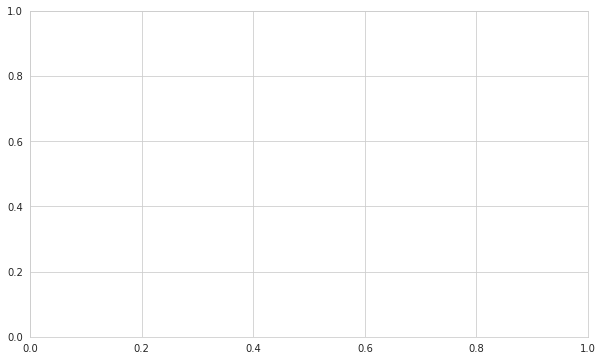

In [19]:
# create good student dataframe
good = df.loc[df.final_grade == 'good']
good['good_alcohol_usage']=good.weekend_alcohol_usage
# create poor student dataframe
poor = df.loc[df.final_grade == 'poor']
poor['poor_alcohol_usage']=poor.weekend_alcohol_usage

plt.figure(figsize=(10,6))
p1=sns.kdeplot(good['good_alcohol_usage'], shade=True, color="r")
p1=sns.kdeplot(poor['poor_alcohol_usage'], shade=True, color="b")
plt.title('Good Performance vs. Poor Performance Student Weekend Alcohol Consumption', fontsize=20)
plt.ylabel('Density', fontsize=16)
plt.xlabel('Level of Alcohol Consumption', fontsize=16)

In [ ]:
alc_perc.plot.bar(colormap="Reds", figsize=(10,8), fontsize=16)
plt.title('Final Grade By Weekend Alcohol Consumption', fontsize=20)
plt.ylabel('Percentage of Logarithm Student Counts', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)

# Hyphothesis Testing confirmed, weekend alcohol consumption has a significant correlation with final grade.

In [ ]:
# chi-square test result -- significant!
import statsmodels.api as sm
alc_table = sm.stats.Table(alc_tab1)
alc_rslt = alc_table.test_nominal_association()
alc_rslt.pvalue

![9](https://user-images.githubusercontent.com/32555702/37250713-5fe38828-24b7-11e8-860a-99b293fceb1f.JPG)

### 4.5 Final Grade By Parents Education Level
see how parents' education level influence student performance

![14](https://user-images.githubusercontent.com/32555702/37250799-4a17cef8-24b9-11e8-8ef7-1c1529d4ecfb.JPG)

In [ ]:
good['good_student_father_education'] = good.father_education
poor['poor_student_father_education'] = poor.father_education
good['good_student_mother_education'] = good.mother_education
poor['poor_student_mother_education'] = poor.mother_education

In [ ]:
# see the difference between good and poor performers' father education level(numeric: from 1 - very low to 5 - very high)
plt.figure(figsize=(6,4))
p2=sns.kdeplot(good['good_student_father_education'], shade=True, color="r")
p2=sns.kdeplot(poor['poor_student_father_education'], shade=True, color="b")
plt.xlabel('Father Education Level', fontsize=20)

In [ ]:
# see the difference between good and poor performers' mother education level(numeric: from 1 - very low to 5 - very high)
plt.figure(figsize=(6,4))
p3=sns.kdeplot(good['good_student_mother_education'], shade=True, color="r")
p3=sns.kdeplot(poor['poor_student_mother_education'], shade=True, color="b")
plt.xlabel('Mother Education Level', fontsize=20)

# OLS tells that parents' education level has a positive correlation with students' final score. Comparatively, mother's education level has bigger influence than father's education level!

In [ ]:
# use OLS to see coefficients
X_edu = df[['mother_education','father_education']]
y_edu = df.final_score
edu = sm.OLS(y_edu, X_edu)
results_edu = edu.fit()
results_edu.summary()

![10](https://user-images.githubusercontent.com/32555702/37250714-6019f084-24b7-11e8-8f47-1b0a5ec046b8.JPG)

### 4.6 Final Grade By Frequency Of Going Out
See how frequency of goig out with friend influence students' final performance

![11](https://user-images.githubusercontent.com/32555702/37250715-605453d2-24b7-11e8-8af9-54f94739f8e5.JPG)

In [ ]:
# going out with friends (numeric: from 1 - very low to 5 - very high)
plt.figure(figsize=(6,10))
sns.boxplot(x='go_out', y='final_score', data=df, palette='hot')
plt.title('Final Grade By Frequency of Going Out', fontsize=20)
plt.ylabel('Final Score', fontsize=16)
plt.xlabel('Frequency of Going Out', fontsize=16)

In [ ]:
out_tab = pd.crosstab(index=df.final_grade, columns=df.go_out)
out_perc = out_tab.apply(perc).reindex(index)

out_perc.plot.bar(colormap="mako_r", fontsize=16, figsize=(14,6))
plt.title('Final Grade By Frequency of Going Out', fontsize=20)
plt.ylabel('Percentage of Student', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)

# Hyphothesis Testing confirmed, the frequency of going out with friends has a significant correlation with students' final performance.

In [ ]:
# chi-square test result -- significant!
out_table = sm.stats.Table(out_tab)
out_rslt = out_table.test_nominal_association()
out_rslt.pvalue

![12](https://user-images.githubusercontent.com/32555702/37250716-60c5d2a0-24b7-11e8-8422-c10374e02553.JPG)

### 4.7 Final Grade By Desire To Go To College
see how desire to go to college influence student final performance

![13](https://user-images.githubusercontent.com/32555702/37250717-60fc7e68-24b7-11e8-8595-c6582ef598f3.JPG)

In [ ]:
# Desire for higher education and study time by age 
plt.figure(figsize=(12,8))
sns.violinplot(x='age', y='study_time', hue='desire_higher_edu', data=df, palette="Accent_r", ylim=(1,6))
plt.title('Distribution Of Study Time By Age & Desire To Receive Higher Education', fontsize=20)
plt.ylabel('Study Time', fontsize=16)
plt.xlabel('Age', fontsize=16)

In [ ]:
higher_tab = pd.crosstab(index=df.final_grade, columns=df.desire_higher_edu)
higher_perc = higher_tab.apply(perc).reindex(index)

In [ ]:
higher_perc.plot.bar(colormap="Vega20_r", figsize=(14,6), fontsize=16)
plt.title('Final Grade By Desire to Receive Higher Education', fontsize=20)
plt.xlabel('Final Grade', fontsize=16)
plt.ylabel('Percentage of Student', fontsize=16)

# Hyphothesis Testing confirmed, the desire of going to college has a significant correlation with students' final performance.

In [ ]:
# chi-square test result -- significant!
import statsmodels.api as sm
higher_table = sm.stats.Table(higher_tab)
higher_rslt = higher_table.test_nominal_association()
higher_rslt.pvalue

![15](https://user-images.githubusercontent.com/32555702/37250719-61a70cac-24b7-11e8-9c02-3268495f16be.JPG)

### 4.8 Final Grade By Living Area
see how the final performance difference between students living in the city and those living in rural areas

![16](https://user-images.githubusercontent.com/32555702/37250720-621b2682-24b7-11e8-86bd-3a0f8b54aec5.JPG)

In [ ]:
# living area: urban vs. rural
df.address = df.address.map({'U':'Urban', 'R':'Rural'})

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(df.address, palette='Vega20b_r')
plt.title('Urban and Rural Students Count', fontsize=20)
plt.xlabel('Living Area', fontsize=16)
plt.ylabel('Number Of Students', fontsize=16)
plt.show()

In [ ]:
ad_tab1 = pd.crosstab(index=df.final_grade, columns=df.address)
ad_tab = np.log(ad_tab1)
ad_perc = ad_tab.apply(perc).reindex(index)

In [ ]:
ad_perc.plot.bar(colormap="RdYlGn_r", fontsize=16, figsize=(8,6))
plt.title('Final Grade By Living Area', fontsize=20)
plt.ylabel('Percentage of Logarithm Student#', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)

# Hyphothesis Testing confirmed, the frequency of going out with friends has a significant correlation with students' final performance.

In [ ]:
# chi-square test result -- significant!
ad_table = sm.stats.Table(ad_tab1)
ad_rslt = ad_table.test_nominal_association()
ad_rslt.pvalue

![17](https://user-images.githubusercontent.com/32555702/37250721-62532320-24b7-11e8-9757-359085d3af97.JPG)

In [ ]:
# explore other variables via OLS
dfl = df.copy()
X_ols = dfl.drop(['period1_score', 'period2_score', 'final_score','final_grade', 'failures','study_time','absences'], axis=1)
X_ols = pd.get_dummies(X_ols)

In [ ]:
mod = sm.OLS(df.final_score, X_ols)
mod = mod.fit()

# 5. Classification
### Use Students' Information To Predict Their Final Grade

### 5.1 Prepare Dataset for Modelling

In [ ]:
# create dataframe dfd for classification
dfd = df.copy()
dfd = dfd.drop([ 'final_score'], axis=1)

In [ ]:
# label encode final_grade
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
dfd.final_grade = le.fit_transform(dfd.final_grade)

In [ ]:
# dataset train_test_split
from sklearn.cross_validation import train_test_split
X = dfd.drop('final_grade',axis=1)
y = dfd.final_grade
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [ ]:
# get dummy varibles 
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [ ]:
# see total number of features
len(list(X_train))

### 5.2 Decision Tree Classification

In [ ]:
# find the optimal # of minimum samples leaf
from sklearn.tree import DecisionTreeClassifier

msl=[]
for i in range(1,58):
    tree = DecisionTreeClassifier(min_samples_leaf=i)
    t= tree.fit(X_train, y_train)
    ts=t.score(X_test, y_test)
    msl.append(ts)
msl = pd.Series(msl)
msl.where(msl==msl.max()).dropna()

In [ ]:
# final model
tree = DecisionTreeClassifier(min_samples_leaf=17)
t= tree.fit(X_train, y_train)
print("Decisioin Tree Model Score" , ":" , t.score(X_train, y_train) , "," , 
      "Cross Validation Score" ,":" , t.score(X_test, y_test))

### 5.3 Random Forest Classification

In [ ]:
# find a good # of estimators
from sklearn.ensemble import RandomForestClassifier

ne=[]
for i in range(1,58):
    forest = RandomForestClassifier()
    f = forest.fit(X_train, y_train)
    fs = f.score(X_test, y_test)
    ne.append(fs)
ne = pd.Series(ne)
ne.where(ne==ne.max()).dropna()

In [ ]:
# find a good # of min_samples_leaf
from sklearn.ensemble import RandomForestClassifier

ne=[]
for i in range(1,58):
    forest = RandomForestClassifier(n_estimators=36, min_samples_leaf=i)
    f = forest.fit(X_train, y_train)
    fs = f.score(X_test, y_test)
    ne.append(fs)
ne = pd.Series(ne)
ne.where(ne==ne.max()).dropna()

In [ ]:
# final model
forest = RandomForestClassifier(n_estimators=36, min_samples_leaf=2)
f = forest.fit(X_train, y_train)
print("Raondom Forest Model Score" , ":" , f.score(X_train, y_train) , "," ,
      "Cross Validation Score" ,":" , f.score(X_test, y_test))

### 5.4 Support Vector Classification

In [ ]:
from sklearn.svm import SVC
svc = SVC()
s= svc.fit(X_train, y_train)
print("SVC Model Score" , ":" , s.score(X_train, y_train) , "," ,
      "Cross Validation Score" ,":" , s.score(X_test, y_test))

### 5.5 Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class='multinomial', solver='newton-cg',fit_intercept=True)

In [ ]:
# find optimal # of features to use in the model
from sklearn.feature_selection import SelectKBest, chi2

ks=[]
for i in range(1,58):
    sk = SelectKBest(chi2, k=i)
    x_new = sk.fit_transform(X_train,y_train)
    x_new_test=sk.fit_transform(X_test,y_test)
    l = lr.fit(x_new, y_train)
    ll = l.score(x_new_test, y_test)
    ks.append(ll)  
    
ks = pd.Series(ks)
ks = ks.reindex(list(range(1,58)))
ks

In [ ]:
plt.figure(figsize=(10,5))
ks.plot.line()
plt.title('Feature Selction', fontsize=20)
plt.xlabel('Number of Feature Used', fontsize=16)
plt.ylabel('Prediction Accuracy', fontsize=16)

In [ ]:
ks.where(ks==ks.max()).dropna()

In [ ]:
# final model
sk = SelectKBest(chi2, k=8)
x_new = sk.fit_transform(X_train,y_train)
x_new_test=sk.fit_transform(X_test,y_test)
lr = lr.fit(x_new, y_train)
print("Logistic Regression Model Score" , ":" , lr.score(x_new, y_train) , "," ,
      "Cross Validation Score" ,":" , lr.score(x_new_test, y_test))

### 5.6 Ada Boost Classification

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=2)
af = ada.fit(X_train, y_train)
print("Ada Boost Model Score" , ":" , af.score(X_train, y_train) , "," ,
      "Cross Validation Score" ,":" , af.score(X_test, y_test))

### 5.7 Stochastic Gradient Descent Classification

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sf = sgd.fit(X_train, y_train)
print("Stochastic Gradient Descent Model Score" , ":" , sf.score(X_train, y_train) , "," ,
      "Cross Validation Score" ,":" , sf.score(X_test, y_test))

### 5.8 Model Selection
Let's compare the performance of each model!

![18](https://user-images.githubusercontent.com/32555702/37250722-62c33d22-24b7-11e8-8612-9c6c9286cc33.JPG)

# 6. Summary

![19](https://user-images.githubusercontent.com/32555702/37250723-63347eec-24b7-11e8-8a26-083c00031fc4.JPG)

![2](https://user-images.githubusercontent.com/32555702/37250705-5dc447f8-24b7-11e8-93fd-201e68bfb4ee.JPG)